In [1]:
!pip install pyiqa

  Obtaining dependency information for pyiqa from https://files.pythonhosted.org/packages/fb/7b/63e143b1346719f1a60f016800b9a511f5b88905bc4f21e245950f824936/pyiqa-0.1.11-py3-none-any.whl.metadata
  Obtaining dependency information for addict from https://files.pythonhosted.org/packages/6a/00/b08f23b7d7e1e14ce01419a467b583edbb93c6cdb8654e54a9cc579cd61f/addict-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for future from https://files.pythonhosted.org/packages/da/71/ae30dadffc90b9006d77af76b393cb9dfbfc9629f339fc1574a1c52e6806/future-1.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for lmdb from https://files.pythonhosted.org/packages/83/67/8f32a70336d3ff1149cbd31e5a877997384f78c3940edc0abff95c8a5601/lmdb-1.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/d9/64/7fdfb9386511cd6805451e012c537073a79a958a58795c4e602e538c388c/opencv_pyt

In [1]:
import pyiqa
from PIL import Image
import numpy as np

2024-05-27 14:59:57.858362: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-27 14:59:58.666413: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:
2024-05-27 14:59:58.666547: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:
2024-05-27 14:59:58.666564: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with Te

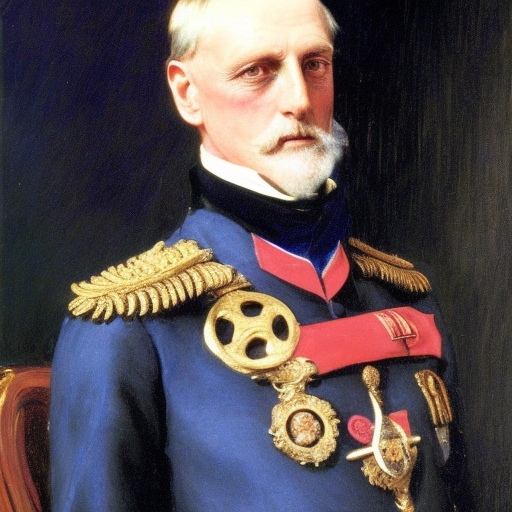

In [2]:
# Load the images
image1 = Image.open('img1.jpg')
image1

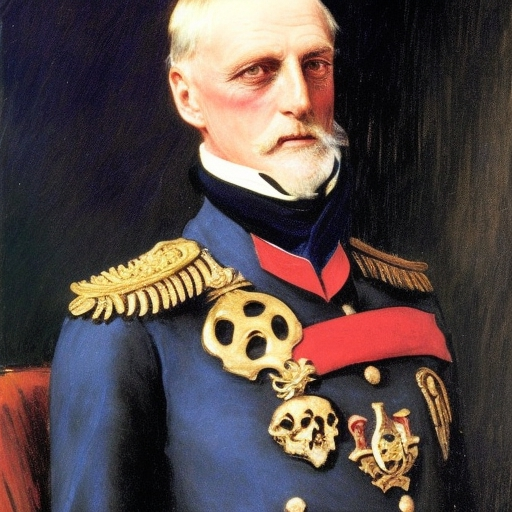

In [3]:
image2 = Image.open('img2.jpg')
image2

In [4]:
models = pyiqa.list_models()
models

['ahiq',
 'brisque',
 'ckdn',
 'clipiqa',
 'clipiqa+',
 'clipiqa+_rn50_512',
 'clipiqa+_vitL14_512',
 'clipscore',
 'cnniqa',
 'cw_ssim',
 'dbcnn',
 'dists',
 'entropy',
 'fid',
 'fsim',
 'gmsd',
 'hyperiqa',
 'ilniqe',
 'inception_score',
 'laion_aes',
 'liqe',
 'liqe_mix',
 'lpips',
 'lpips-vgg',
 'mad',
 'maniqa',
 'maniqa-kadid',
 'maniqa-koniq',
 'maniqa-pipal',
 'ms_ssim',
 'musiq',
 'musiq-ava',
 'musiq-koniq',
 'musiq-paq2piq',
 'musiq-spaq',
 'nima',
 'nima-koniq',
 'nima-spaq',
 'nima-vgg16-ava',
 'niqe',
 'nlpd',
 'nrqm',
 'paq2piq',
 'pi',
 'pieapp',
 'psnr',
 'psnry',
 'qalign',
 'ssim',
 'ssimc',
 'stlpips',
 'stlpips-vgg',
 'topiq_fr',
 'topiq_fr-pipal',
 'topiq_iaa',
 'topiq_iaa_res50',
 'topiq_nr',
 'topiq_nr-face',
 'topiq_nr-flive',
 'topiq_nr-spaq',
 'tres',
 'tres-flive',
 'tres-koniq',
 'unique',
 'uranker',
 'vif',
 'vsi',
 'wadiqam_fr',
 'wadiqam_nr']

In [6]:
metric = pyiqa.create_metric('psnr')
metric.lower_better

False

In [7]:
# Calculate the PSNR between the two images
metric(image1, image2)

tensor([21.8616], device='cuda:0')

In [4]:
import pyiqa
from PIL import Image
import torch
from torchvision import transforms

# Load images
image1 = Image.open('img1.jpg').convert('RGB')
image2 = Image.open('img2.jpg').convert('RGB')

# Define a transform to preprocess the images
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to the same size
    transforms.ToTensor(),          # Convert to tensor
])

# Apply transformations
image1 = transform(image1).unsqueeze(0)  # Add batch dimension
image2 = transform(image2).unsqueeze(0)  # Add batch dimension

# Ensure the images are on the same device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image1 = image1.to(device)
image2 = image2.to(device)

# Create metrics
psnr_metric = pyiqa.create_metric('psnr').to(device)
ssim_metric = pyiqa.create_metric('ssim').to(device)
lpips_metric = pyiqa.create_metric('lpips').to(device)


print(f'PSNR: {psnr_metric.lower_better}')
print(f'SSIM: {ssim_metric.lower_better}')
print(f'LPIPS: {lpips_metric.lower_better}')

# Calculate metrics
psnr_value = psnr_metric(image1, image2)
ssim_value = ssim_metric(image1, image2)
lpips_value = lpips_metric(image1, image2)


print(f'PSNR: {psnr_value.item()}')
print(f'SSIM: {ssim_value.item()}')
print(f'LPIPS: {lpips_value.item()}')

Loading pretrained model LPIPS from /home/jovyan/.cache/torch/hub/checkpoints/LPIPS_v0.1_alex-df73285e.pth
PSNR: False
SSIM: False
LPIPS: True
PSNR: 23.33473014831543
SSIM: 0.9049428039691061
LPIPS: 0.09426299482584


In [5]:
psnr_value = psnr_metric(image1, image1)
ssim_value = ssim_metric(image1, image1)
lpips_value = lpips_metric(image1, image1)


print(f'PSNR: {psnr_value.item()}')
print(f'SSIM: {ssim_value.item()}')
print(f'LPIPS: {lpips_value.item()}')

PSNR: 80.0
SSIM: 0.9999999999999999
LPIPS: 0.0


In [9]:
import pyiqa
from PIL import Image
# import torch
# from torchvision import transforms

# # Load images
# image1 = Image.open('img1.jpg').convert('RGB')
# image2 = Image.open('img2.jpg').convert('RGB')

# # Define a transform to preprocess the images
# transform = transforms.Compose([
#     transforms.Resize((299, 299)),  # Resize to the size expected by Inception v3
#     transforms.ToTensor(),          # Convert to tensor
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
# ])

# # Apply transformations
# image1 = transform(image1).unsqueeze(0)  # Add batch dimension
# image2 = transform(image2).unsqueeze(0)  # Add batch dimension

# # Stack images into a batch
# images = torch.cat([image1, image2], dim=0)

# # Ensure the images are on the same device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# images = images.to(device)

# Create the Inception Score metric
is_metric = pyiqa.create_metric('inception_score').to(device)

# Calculate the Inception Score
# is_metric.eval()  # Ensure the metric is in evaluation mode
# with torch.no_grad():  # Disable gradient calculation for evaluation
inception_score = is_metric('is_img')

print(f'Inception Score: {inception_score}')


Loading pretrained model Inception3 from /home/jovyan/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
Compute inception score for is_img
Found 2 images in the folder is_img


Inception Score is_img: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.27it/s]

Inception Score: {'inception_score_mean': 0.9999999701976776, 'inception_score_std': 2.9802322387695312e-08}
